## Análise exploratória dados ENEM 2016

A partir desta análise deseja-se encontrar quais as variáveis são mais relevantes para a solução de prever as notas de matemática do ENEM 2016.

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Retorna 2 dataframes (candidatos ausentes e presente) com variaveis desejadas
def load_data(nome_arquivo):  
    variaveis_usadas = ["NU_INSCRICAO", "CO_UF_RESIDENCIA", "NU_IDADE", "TP_COR_RACA", "TP_NACIONALIDADE", "TP_ST_CONCLUSAO",
    "TP_ANO_CONCLUIU", "TP_ESCOLA", "TP_ENSINO", "IN_TREINEIRO", 
    "TP_DEPENDENCIA_ADM_ESC", "TP_PRESENCA_LC", "CO_PROVA_MT", "NU_NOTA_CN", "NU_NOTA_CH", 
    "NU_NOTA_LC", "TP_LINGUA", "NU_NOTA_COMP1",
    "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5",
    "NU_NOTA_REDACAO", "Q001", "Q002", "Q006", "Q024", "Q025", "Q026", "Q027", "Q047", "NU_NOTA_MT"]
    
    df = pd.read_csv(nome_arquivo, sep=',')
    print("\nTamanho inicial dataframe: {}".format(df.shape))
    
    df = df[variaveis_usadas]
    
    # Candidatos ausentes/desclassificados
    df_ausente = df[ (df["TP_PRESENCA_LC"] != 1) ] 
    df_ausente = df_ausente.drop(columns=['TP_PRESENCA_LC']) #coluna desnecessaria
    
    # Candidatos presentes
    df = df[ (df["TP_PRESENCA_LC"] == 1) ] 
    df = df.drop(columns=['TP_PRESENCA_LC']) #coluna desnecessaria
    
    
    print("\nTamanho final dataframe de candidatos presentes: {}".format(df.shape))
    print("\nTamanho final dataframe de candidatos ausentes: {}".format(df_ausente.shape))
    return df, df_ausente

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

### Descrevendo os dados e sua distribuição 

In [261]:
nome_arquivo = "testfiles/train.csv"
df, df_ausente = load_data(nome_arquivo)

print(df['NU_NOTA_MT'].describe())


Tamanho inicial dataframe: (13730, 167)

Tamanho final dataframe de candidatos presentes: (10133, 31)

Tamanho final dataframe de candidatos ausentes: (3597, 31)
count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64


Não é comum a nota da prova ser zero. Analisando, têm-se:

In [262]:
df_notas_zero = df[df["NU_NOTA_MT"]== 0]
print(df_notas_zero["NU_NOTA_MT"].describe())

count    10.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: NU_NOTA_MT, dtype: float64


10 pessoas como outliers, serão removidos da base de dados. A nova base então é:

count    10123.000000
mean       482.974563
std         98.716334
min        320.500000
25%        409.000000
50%        461.200000
75%        537.700000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

Skewness: 1.053933
Kurtosis: 1.044724


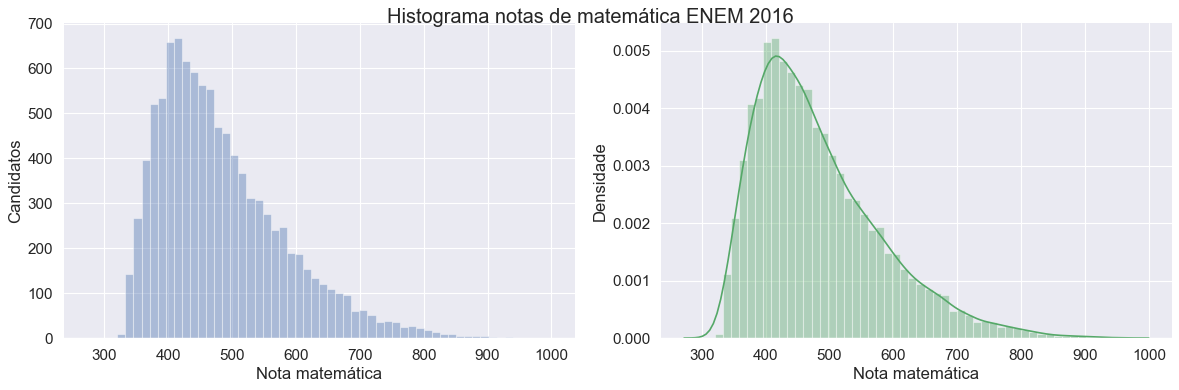

In [263]:
df = df[df["NU_NOTA_MT"] != 0]
print(df['NU_NOTA_MT'].describe())

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, dpi= 80, facecolor='w', edgecolor='k')
sns.despine(left=True)

sns.distplot(df['NU_NOTA_MT'], kde=False, color="b", ax=axes[0])
sns.distplot(df['NU_NOTA_MT'], kde=True, color="g", ax=axes[1])

fig.suptitle("Histograma notas de matemática ENEM 2016")
axes[0].set_ylabel("Candidatos")
axes[0].set_xlabel("Nota matemática")

axes[1].set_xlabel("Nota matemática")
axes[1].set_ylabel("Densidade")

plt.tight_layout()

#skewness and kurtosis
print("\nSkewness: %f" % df['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % df['NU_NOTA_MT'].kurt())

#### Analisando as notas em ordem crescente:

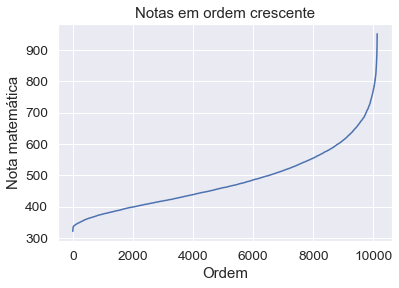

In [264]:
vet_ordenado = np.sort(df['NU_NOTA_MT'])
plt.plot(vet_ordenado)
plt.title('Notas em ordem crescente')
plt.ylabel('Nota matemática')
plt.xlabel('Ordem')
plt.show()

Percebe-se que as notas têm um comportamento próximo de linear até aproximadamente a nota 530 (75% das amostras). Após isto ela apresenta um comportamento próximo de exponencial. Podemos ver este comportamento melhor abaixo:

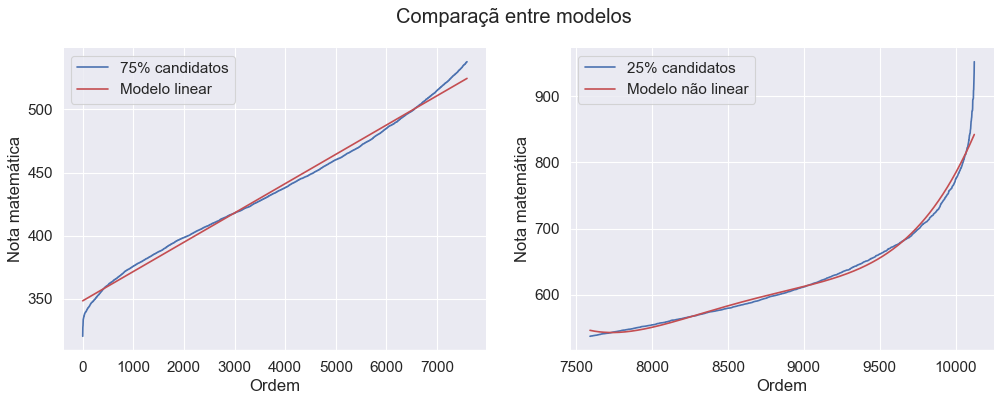

In [265]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
sns.despine(left=True)

indx = int(len(vet_ordenado)*0.75) # Selecionando 75% dos dados

# Calculo modelo linear
x_reta = np.arange(0, indx)
y_reta = vet_ordenado[0:indx]
y_model_reta = np.polyfit(x_reta, y_reta, 1)
y_model_reta_plot = np.poly1d(y_model_reta)

# Plot retas
sns.lineplot(x_reta, y_reta, color="b", ax=axes[0], label='75% candidatos')
sns.lineplot(x_reta, y_model_reta_plot(x_reta), color="r", ax=axes[0], label='Modelo linear')


# Calculo modelo exponencial
x_expo = np.arange(indx, len(vet_ordenado))
y_expo = vet_ordenado[indx:]


y_model_poly = np.polyfit(x_expo, y_expo, 4)
y_model_poly_plot = np.poly1d(y_model_poly)


# Plot polinomiais
sns.lineplot(x_expo, y_expo, color="b", ax=axes[1], label='25% candidatos')
sns.lineplot(x_expo, y_model_poly_plot(x_expo), color="r", ax=axes[1], label='Modelo não linear')



fig.suptitle("Comparaçã entre modelos")
axes[0].set_ylabel("Nota matemática")
axes[0].set_xlabel("Ordem")

axes[1].set_xlabel("Ordem")
axes[1].set_ylabel("Nota matemática")

plt.show()
#plt.tight_layout()

Para entender melhor os candidatos, eles serão separados em 4 grupos de acordo com as notas de matemtáticas obtidas:
- Grupo 1 (G1): Notas abaixo de 420 pontos
- Grupo 2 (G2): Notas entre 420 e abaixo de 550 pontos
- Grupo 3 (G3): Notas entre 550 e 650 pontos
- Grupo 4 (G4): Notas acima de 650 pontos

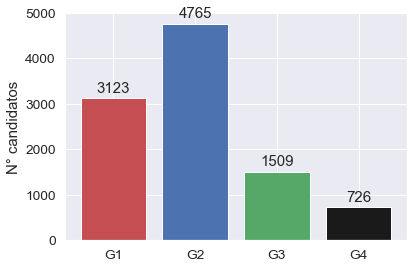

In [266]:
conditions = [
    (df['NU_NOTA_MT'] < 420),
    (df['NU_NOTA_MT'] >= 420) & (df['NU_NOTA_MT'] < 550),
    (df['NU_NOTA_MT'] >= 550) & (df['NU_NOTA_MT'] < 650),
    (df['NU_NOTA_MT'] >= 650)
    ]

choices = ['G1', 'G2', 'G3', 'G4']
#choices = [1,2,3,4]
           
df['grupo'] = np.select(conditions, choices)

# Plot demonstrando cores e grupos
fig, ax = plt.subplots()

qtde = df.groupby('grupo').count()['NU_INSCRICAO']
rects1 = ax.bar(qtde.index, qtde.values, color =['r','b','g', 'k'])
ax.set_ylabel("N° candidatos")
autolabel(rects1)


fig.tight_layout()
plt.show()

### Relacionando as notas de matemática com as demais variáveis do modelo

Antes de prosseguir com a análise das demais variáveis, é importante saber a quantidade de dados faltantes:

In [267]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentagem'])
missing_data.head(5)

,Total,Porcentagem
TP_ENSINO,6488,0.640917
TP_DEPENDENCIA_ADM_ESC,6488,0.640917
Q027,6118,0.604366
NU_NOTA_CN,35,0.003457
NU_NOTA_CH,35,0.003457


As variáveis referentes ao tipo de escola que o canditato frequentou e a resposta da pergunta <i>"Com que idade você começou a exercer uma atividade remunerada?"</i> possuem mais de 60% de dados faltantes cada. Os dados faltantes correspondentes as notas das provas de ciências humanas e da natureza podem ser ignoradas.

Outro ponto importante a se fazer é transformar as respostas do questionário socioeconômico de letras, para números. A conversão será direta, então: A -> 1, B -> 2, C -> 3, etc. O mesmo ocorrerá para os tipos de cadernos da prova de matemática.

In [268]:
# Alterando o tipo de dado do dataframe

# Questionario socioeconomico
dic = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 18}

df.loc[:,'Q001':'Q047'] = df.loc[:,'Q001':'Q047'].replace(dic)

# Caderno de matematica
tipos_caderno = df['CO_PROVA_MT'].unique() 
dic_caderno = {tipos_caderno[0]: 1, tipos_caderno[1]: 2, tipos_caderno[2]: 3,
               tipos_caderno[3]: 4, tipos_caderno[4]: 5, tipos_caderno[5]: 6,
               tipos_caderno[6]: 7, tipos_caderno[7]: 8
               }

df['CO_PROVA_MT'] = df['CO_PROVA_MT'].replace(dic_caderno)

Após a transformação de variável no questionário socioeconômico, será dado um <i>score</i> para cada candidato. O score será a soma de cada resposta do questionário vezes um peso arbitrário. Espera-se que quanto maior o score, mais acesso à educação o candidato obteve durante a vida.

In [278]:
aux_q027 = df['Q027'].fillna(0) #Substituir nan por zero
w = [1,2,5,3,10,2,1,5]

func = (df['Q001']*w[0]+ df['Q002']*w[1] + df['Q006']*w[2] + 
            df['Q024']*w[3] + df['Q025']*w[4] + df['Q026']*w[5] + 
            df['Q047']*w[6] + aux_q027*w[7])


df['score'] = func

#### Matriz de correlação

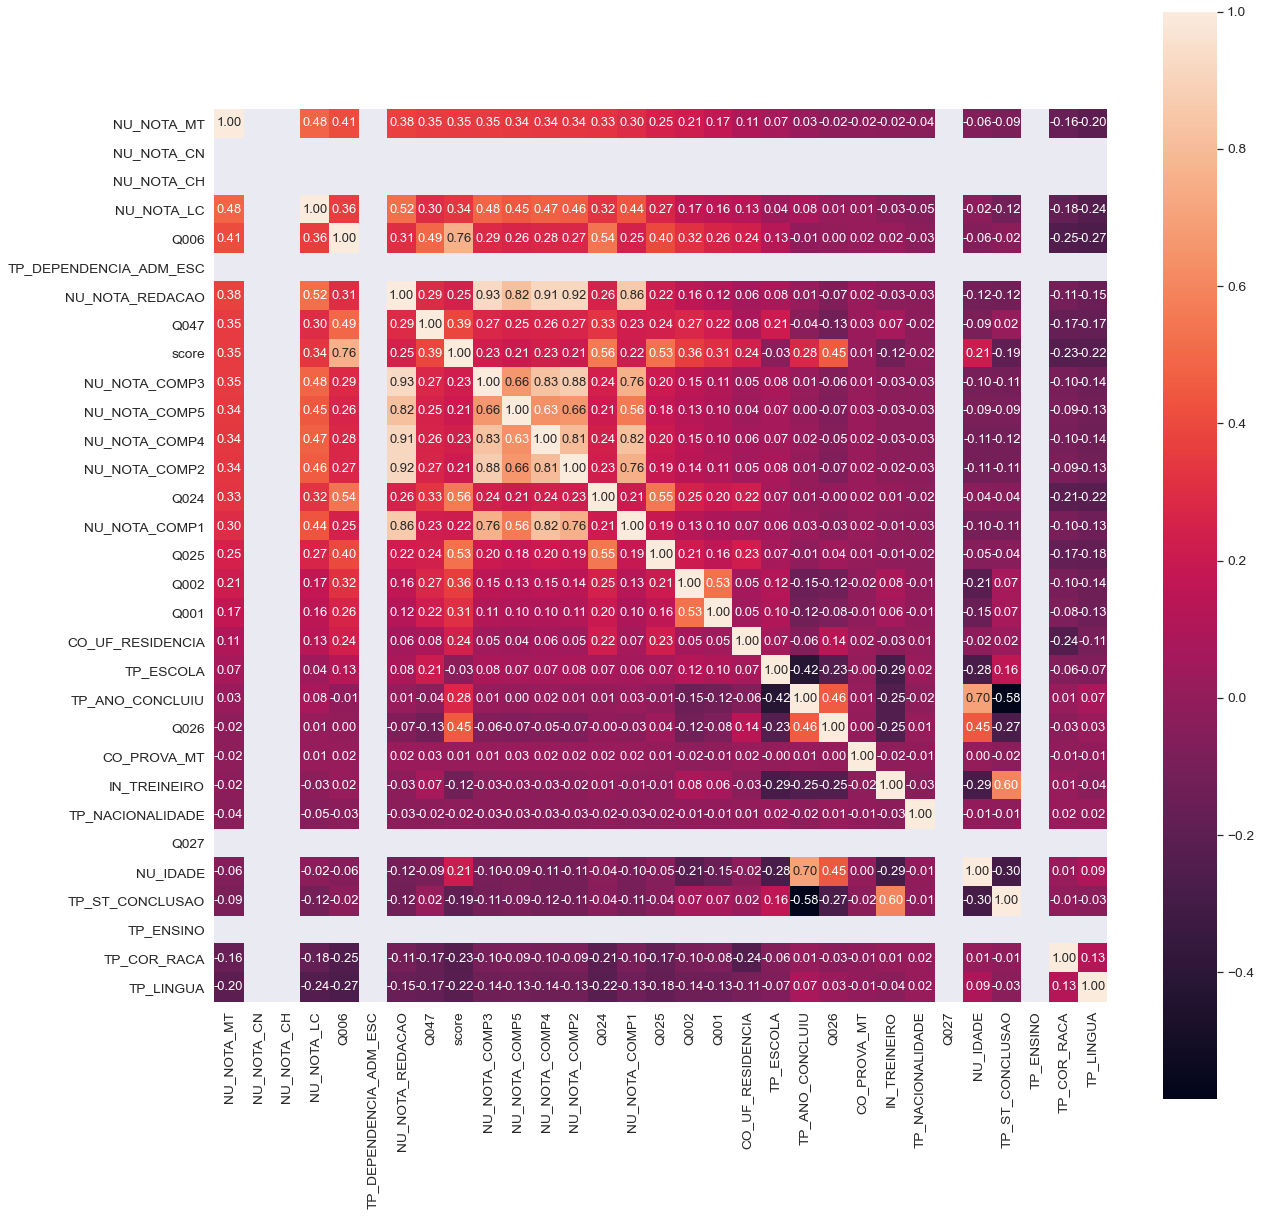

In [309]:
corrmat = df.corr()

# Matriz de correlacao das variaveis
f, ax = plt.subplots(figsize=(20, 20))
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'NU_NOTA_MT')['NU_NOTA_MT'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Dada a matriz de correlação acima, algumas variáveis foram escolhidas para serem analisdas mais a fundo:


In [321]:
cor_positiva = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'Q006',
       'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_REDACAO', 'Q047', 'score',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2',
       'Q024', 'NU_NOTA_COMP1', 'Q025', 'Q002', 'Q001', 'CO_UF_RESIDENCIA','grupo']
print("Correlação positiva:")
print(cor_positiva)
                    

cor_negativa = ['NU_NOTA_MT','TP_ENSINO', 'TP_COR_RACA', 'grupo']
print("\nCorrelação negativa:")
print(cor_negativa)

Correlação positiva:
['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'Q006', 'TP_DEPENDENCIA_ADM_ESC', 'NU_NOTA_REDACAO', 'Q047', 'score', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'Q024', 'NU_NOTA_COMP1', 'Q025', 'Q002', 'Q001', 'CO_UF_RESIDENCIA', 'grupo']

Correlação negativa:
['NU_NOTA_MT', 'TP_ENSINO', 'TP_COR_RACA', 'grupo']


#### Correlação negativa

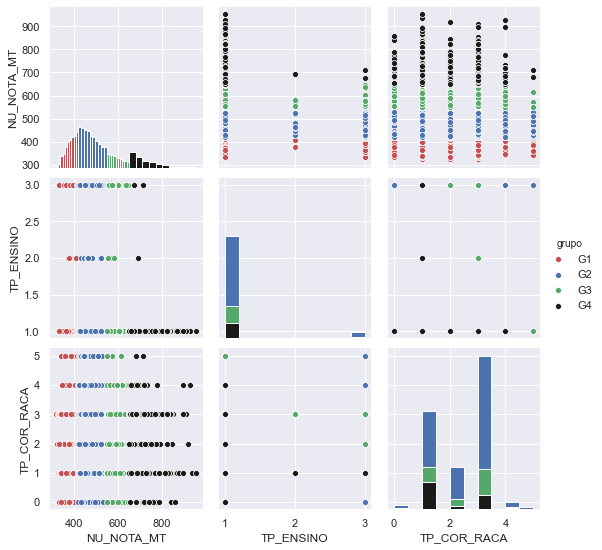

In [322]:
#scatterplot
dic_cores = {"G1":'r', "G2": 'b', "G3": 'g', "G4": 'k' }
sns.set()
g = sns.pairplot(df[cor_negativa], hue = 'grupo', palette = dic_cores,diag_kind='hist')
plt.show();

#### Correlação positiva

KeyError: 'grupo'

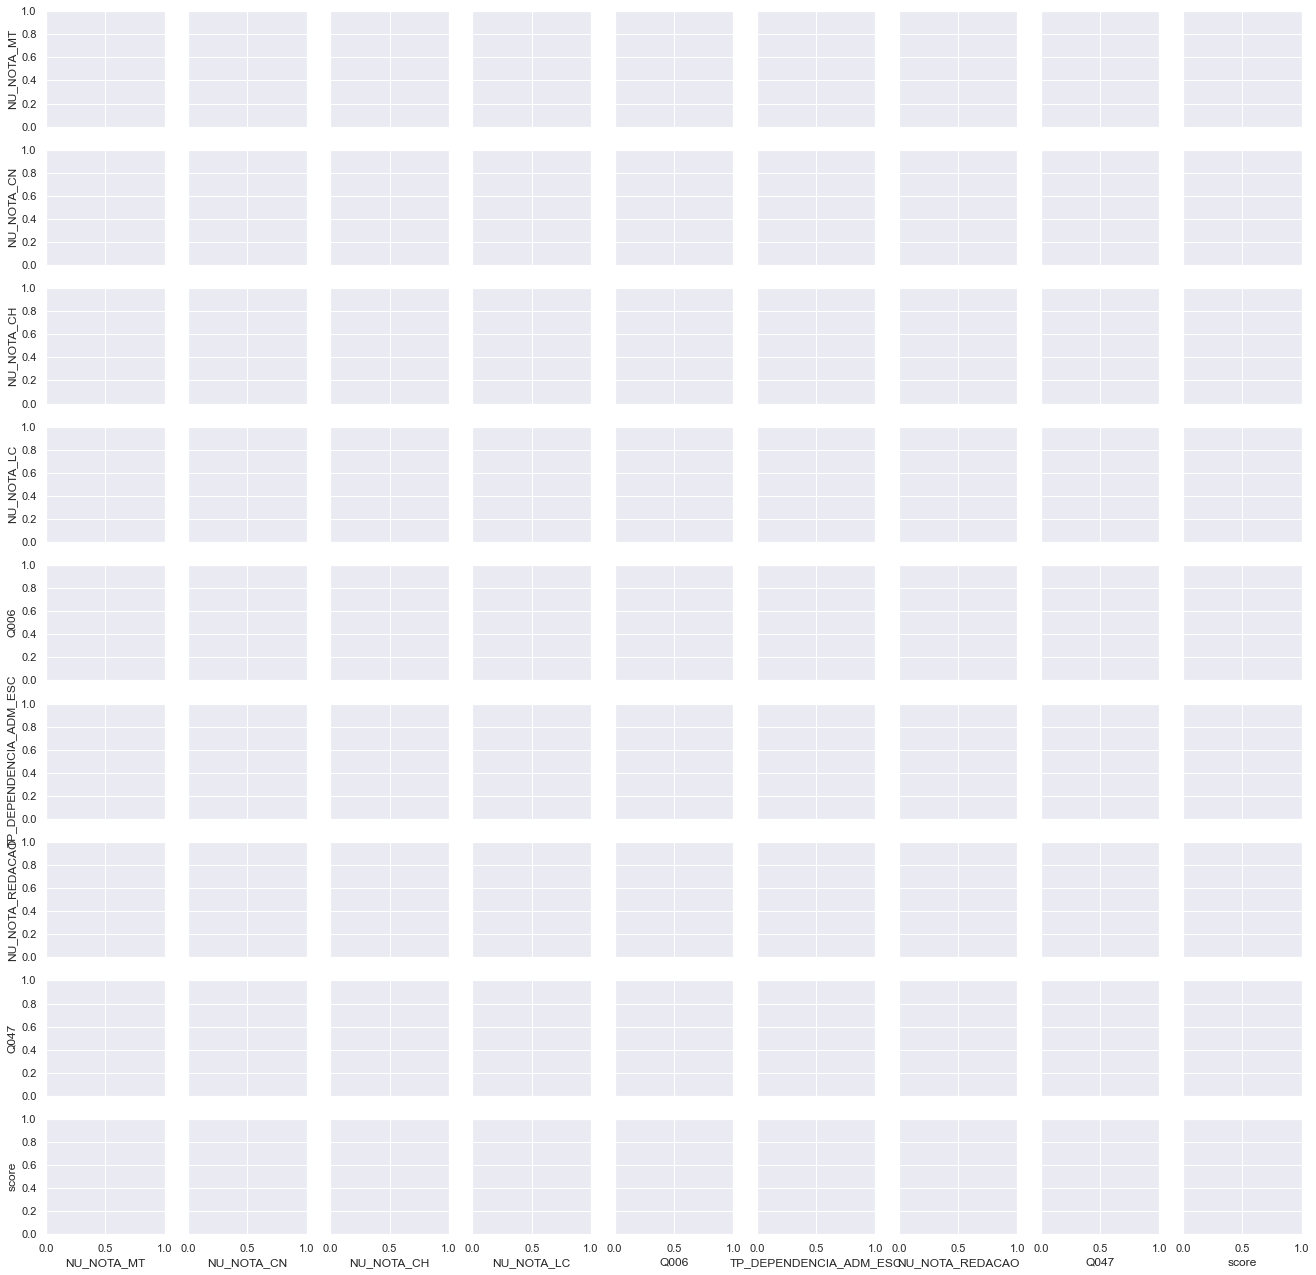

In [326]:
#scatterplot
dic_cores = {"G1":'r', "G2": 'b', "G3": 'g', "G4": 'k' }
sns.set()
g = sns.pairplot(df[cor_positiva[0:9]], hue = 'grupo', palette = dic_cores,diag_kind='hist')
plt.show();

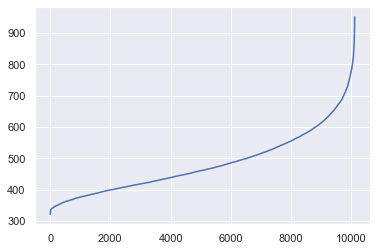

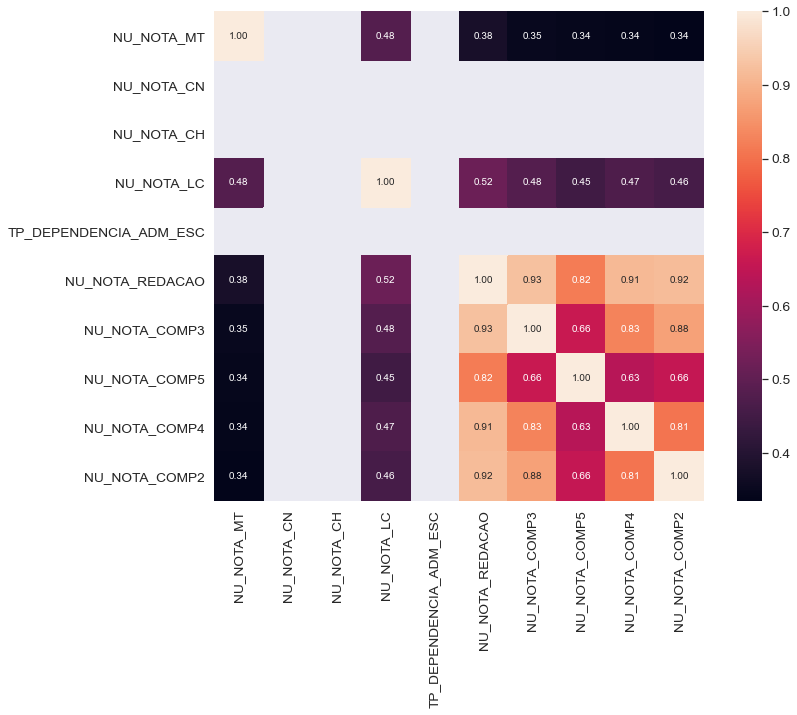

In [8]:
df_aux = df.dropna(subset = ['NU_NOTA_CN'])
corrmat = df_aux.corr()
f, ax = plt.subplots(figsize=(12, 9))

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'NU_NOTA_MT')['NU_NOTA_MT'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [9]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

NameError: name 'df_train' is not defined